# HW4: Regression
## Names and id's:
### Student 1: Shani Shalev, 316315720
### Student 2: Yosef Ben Yehuda, 20710877

In [85]:
#import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(
    style='white',
    context='talk',
    palette='Set1'
)
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

## Abalone dataset

The [Abalone dataset](https://www.kaggle.com/datasets/hurshd0/abalone-uci/data), available on Kaggle, comprises measurements of physical attributes of abalones, a type of marine mollusk. These attributes include the number of rings, which is often used to estimate the age of the abalone, as well as measurements such as diameter, height, and weight. The dataset also includes categorical information such as the sex of the abalone.


Load the data into a Pandas DataFrame and display the first 5 rows.

In [86]:
filename = '../data/abalone.csv'

In [87]:
#Your code here
abalone_df = pd.read_csv(filename)
abalone_df.head(), abalone_df.shape

(  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
 0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
 1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
 2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
 3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
 4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   
 
    Shell weight  Rings  
 0         0.150     15  
 1         0.070      7  
 2         0.210      9  
 3         0.155     10  
 4         0.055      7  ,
 (4177, 9))

Inspect the DataFrame for null values, and if any are found, remove the corresponding rows.

In [88]:
#Your code here
nan_values = abalone_df.isnull().sum() #count the number of NaN values in each column
abalone_df.dropna(axis=0) #remove the rows with NaN values
print(nan_values, abalone_df.shape) #print the number of NaN values in each column and the new shape of the DataFrame

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64 (4177, 9)


Note that the Sex column contains three different possibel values: F,M and I (infant).Use one-hot-encoding to convert the 'Sex' column into two binary (0/1) columns to prepare it for use in machine learning models in the subsequent sections.

In [89]:
#Your code here
abalone_df = pd.get_dummies(abalone_df, prefix=['Sex'], columns=['Sex'], drop_first=True)
abalone_df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,True,False


Perform exploratory data analysis (EDA) on the dataset, examining distributions and correlations between columns (generate at least three different figures).

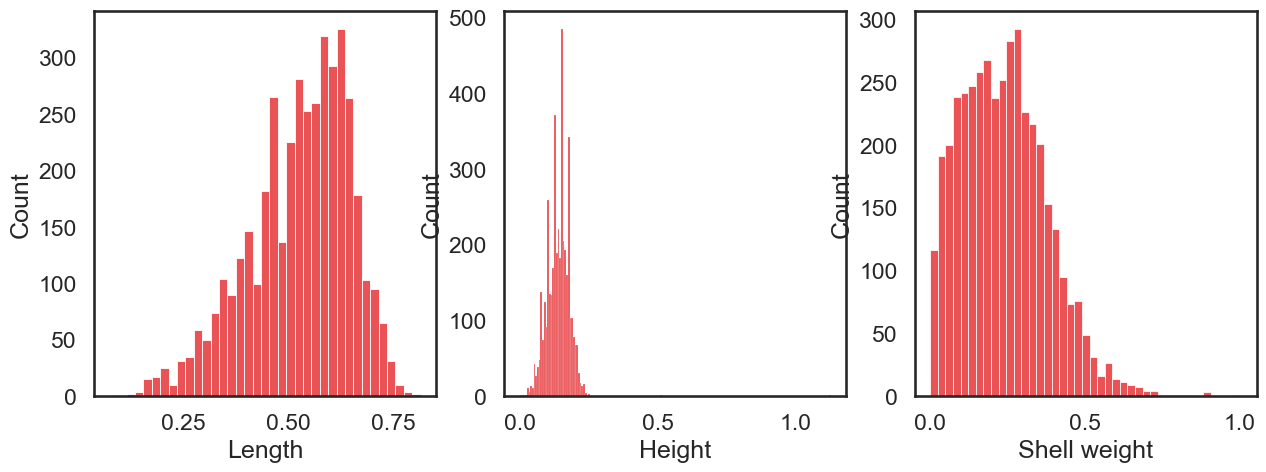

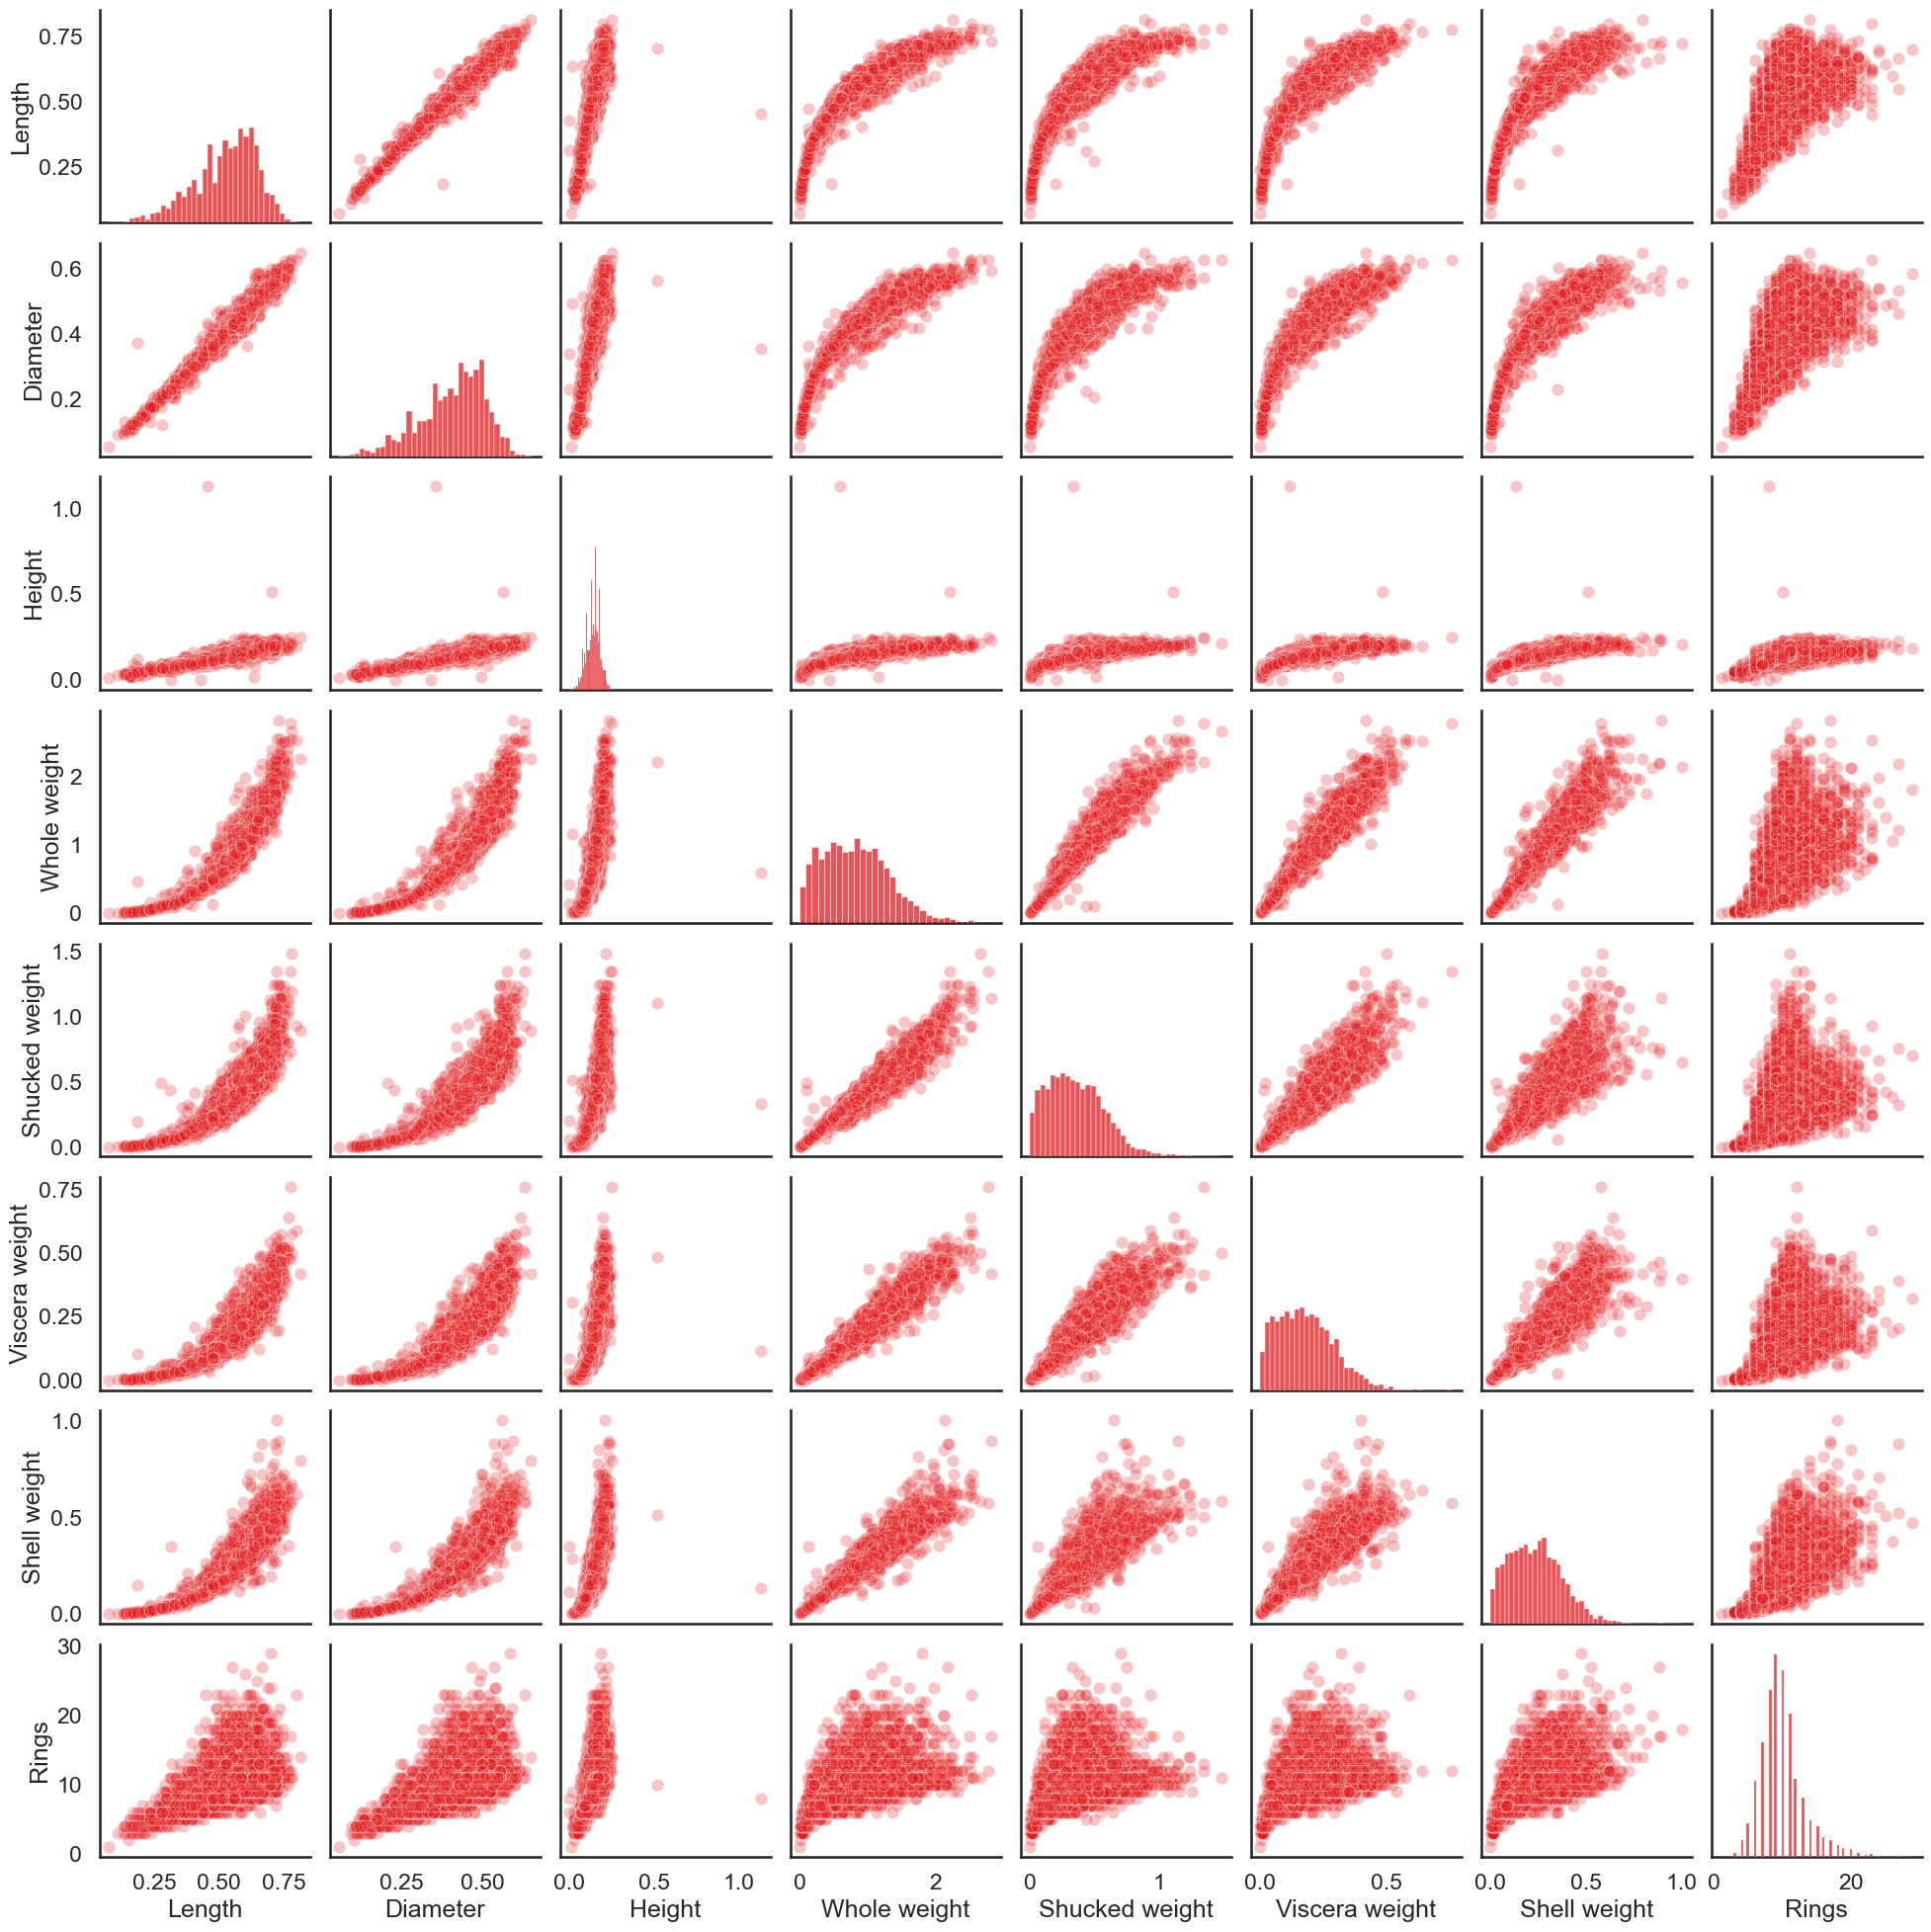

In [90]:
#Your code here, add additional codeand text sections yourself.
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(abalone_df['Length'], ax=ax[0])
sns.histplot(abalone_df['Height'], ax=ax[1])
sns.histplot(abalone_df['Shell weight'], ax=ax[2])
plt.show()
sns.pairplot(abalone_df.drop(columns=['Sex_I', 'Sex_M']), plot_kws=dict(alpha=0.25))
plt.show()

Divide the dataset into training and testing sets, allocating 20% of the data for testing purposes. Remember that the target variable (y) is the number of **Rings**.

In [91]:
#Your code here
X = abalone_df.drop(columns='Rings') #all columns except the target column
y = abalone_df['Rings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Train a linear regression model and calculate the R-squared (r2) score for both the training data (using cross-validation approach) and on the test set.

In [92]:
#Your code here
lr = LinearRegression()
cv_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr.fit(X_train, y_train)
test_score = lr.score(X_test, y_test)
train_score = cv_scores.mean()
print(f'Linear model train score: {train_score},\nLinear model test score: {test_score},\nLinear model training CV scores: {cv_scores}')

Linear model train score: 0.520689419967592,
Linear model test score: 0.5425630579816496,
Linear model training CV scores: [0.54486576 0.5392047  0.46864081 0.5255768  0.52515904]


Do you think we're overfitting based on the scores we got? Should we use regularization? Next, we'll try a new regularized model called Elastic Net to see if it helps improve our performance.

## Elastic Net
Elastic Net is a regularization technique used in linear regression, similar to Ridge and Lasso regression. It combines the penalties of both Ridge and Lasso to overcome their limitations.

The loss function is given by:
$\sum_{i=1}^{n}(y-y_{h})^2+\lambda_1\sum_{i=1}^{q}\theta_{i}+\lambda_2\sum_{i=1}^{q}\theta_{i}^2$

Like Ridge, Elastic Net adds a penalty term to the regression equation to prevent overfitting by shrinking the coefficients towards zero. However, like Lasso, it also performs variable selection by setting some coefficients exactly to zero, effectively removing them from the model.

Elastic Net is particularly useful when dealing with datasets containing highly correlated features, as it can select groups of correlated features together, unlike Lasso which tends to select only one feature from a group.

The sklearn [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) function employs the following parametrization :
alpha = $ \lambda_1+\lambda_2$ and l1_ratio = $\lambda_1/(\lambda_1+\lambda_2)$
So, for example, setting alpha = 0 corredpongs to standard Linear regression (No L1 penalty or L2 penalty) and setting alpha>0 with l1_ratio = 1 corresponds to the Lasso regression. Make sure you understand that :)



First, scale the training and test sets as we did in class. Remember to fit the scaling on the training-set only, and use the fitted scaling object to scale the test set.

In [93]:
#Your code here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_train_st = scaler.transform(X_train)
x_test_st = scaler.transform(X_test)

Now, fit the `ElasticNet` model for each l1_ratio value within the following range- a linear interval of size 10 ranging from 0.1 to 1 (you can achieve this by using np.linspace) , while keeping alpha at its default value (1.0). Next, use the `cross_val_score` function we used in class to estimate and plot the training cross-validation score of the model as a function of l1_ratio. Finally, provide your conclusion based on the observed trend in the plot.

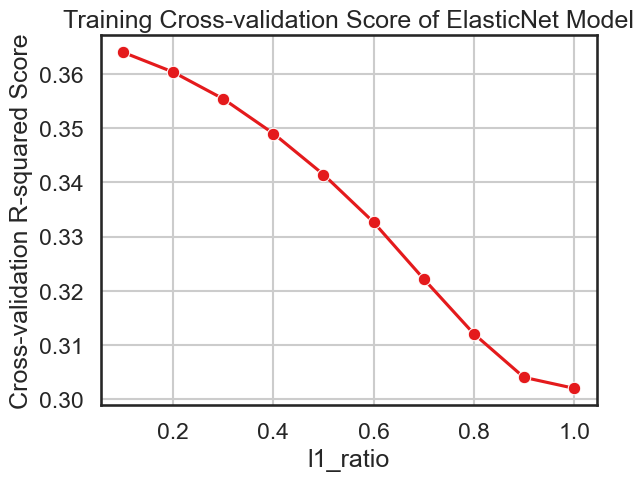

In [94]:
#Your code here
l1_ratios = np.linspace(0.1, 1, 10)
alpha = 1.0
cv_scores = []
for l1_ratio in l1_ratios:
    en = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    cv_score = cross_val_score(en, x_train_st, y_train, cv=5)
    cv_scores.append(cv_score.mean())
sns.lineplot(x=l1_ratios, y=cv_scores, marker='o')
plt.xlabel('l1_ratio')
plt.ylabel('Cross-validation R-squared Score')
plt.title('Training Cross-validation Score of ElasticNet Model')
plt.grid()
plt.show()

How does l1_ratio affect the performance when keeping alpha at its default value?

Now, fit the `ElasticNet` model for each alpha value within the following range- a logarithmic interval of size 10 ranging from -3 to 1 (you can achieve this by using np.logspace) , while keeping l1_ratio at its default value (0.5). Next, plot the mean training cross-validation score of the model as a function of alpha. Finally, provide your conclusion based on the observed trend in the plot- how does l1 ratio affect the CV scores?

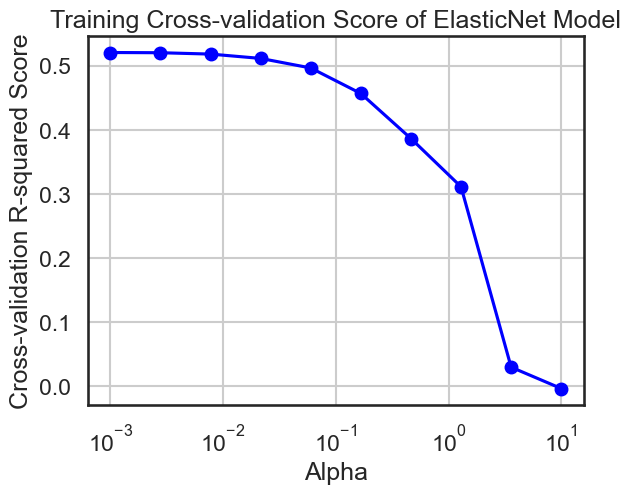

In [97]:
#Your code here
alphas = np.logspace(-3, 1, 10)
l1_ratio = 0.5
cv_scores = []
for alpha in alphas:
    en = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    cv_score = cross_val_score(en, x_train_st, y_train, cv=5)
    cv_scores.append(cv_score.mean())
plt.semilogx(alphas, cv_scores, color='blue', marker='o')
plt.xlabel('Alpha')
plt.ylabel('Cross-validation R-squared Score')
plt.title('Training Cross-validation Score of ElasticNet Model')
plt.grid()
plt.show()

How does alpha affect the performance, when keeping l1_ratio at its default value? 


Note that in the previous section we only estimated Finally, utilize the `GridSearchCV` function to fit the model on a **combined grid** of l1 ratios and alpha values (based on the same grids you used before), as we did in class. Remember that for every combination of l1 ratio and alpha, the `GridSearchCV`  estimates the cross-validation score, and selects the model corresponding to the highest CV score among them. 
Report the best parameters chosen by the algorithm and their corresponding CV score and estimate the model performance on the test set.

In [96]:
#Your code here
param_grid = {
    'alpha': alphas,
    'l1_ratio': l1_ratios
}
en = ElasticNet()
combined_grid = GridSearchCV(en, param_grid, cv=5)
combined_grid.fit(x_train_st, y_train)
print(f'Best parameters: {combined_grid.best_params_},\nBest CV score for cost function: {combined_grid.best_score_},\nTest score: {combined_grid.score(x_test_st, y_test)}')

Best parameters: {'alpha': 0.0027825594022071257, 'l1_ratio': 1.0},
Best CV score for cost function: 0.520885492848542,
Test score: 0.5418927248505743


### Question
Did the optimized Elastic Net model outperform the standard linear regression? Is regularization truly necessary for this dataset? 

### Our answer: 
**The ElasticNet model _did not_ outperform the standard linear regression model**, since the test scores of both models are the same, `ElasticNet t.score is: 0.492`, `linear regression t.score is: 0.493`.

Hence, **regularization _is not_ necessary for this dataset** because the chance for over fitting in linear regression model is very low in general, since there is a relative small number of parameters. However, in other models, when the number of parameters increases, the chance for over fitting rises accordingly. In those cases, the "punishment" of ElasticNet might be necessary.